# ML Model Horse Racing Predictions
#### Create an ML model that can predict whether a horse has a good chance of winning a race, based on the horse's features

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
cleaned_2020_2019_df = pd.read_csv("Data_Racing/International_Data/cleaned_2020_2019_df.csv")
cleaned_2020_2019_df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-07-23 18:38:47.879368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Unnamed: 0,ages,metric,ncond,age,saddle,decimalPrice,isFav,RPR,TR,OR,father,weight,res_win
0,0,3yo+,1407.0,1,5.0,3.0,0.200000,0,63.0,NaN,56.0,Makfi,57,0.0
1,1,3yo+,1407.0,1,6.0,7.0,0.333333,1,67.0,NaN,53.0,Commands,56,0.0
2,2,3yo+,1407.0,1,3.0,11.0,0.004587,0,49.0,NaN,49.0,All Too Hard,54,0.0
3,5,3yo+,1407.0,1,4.0,9.0,0.027778,0,46.0,NaN,52.0,Showcasing,55,0.0
4,7,3yo+,1407.0,1,4.0,2.0,0.004975,0,45.0,NaN,57.0,Kodiac,57,0.0


In [2]:
cleaned_2020_2019_df = cleaned_2020_2019_df.drop(columns = "Unnamed: 0")

In [3]:
# Determine the number of unique values in each column.
cleaned_2020_2019_df.nunique()

ages             24
metric           61
ncond            18
age              15
saddle           39
decimalPrice    600
isFav             2
RPR             178
TR              170
OR              173
father          413
weight           36
res_win           2
dtype: int64

## Select equal res_win values

In [4]:
# Look at value counts for binning
res_win_counts = cleaned_2020_2019_df["res_win"].value_counts()
class_count = res_win_counts.min()
class_count

26108

In [5]:
res_win_equal = pd.concat([cleaned_2020_2019_df[cleaned_2020_2019_df.res_win==0].sample(n=class_count), 
                           cleaned_2020_2019_df[cleaned_2020_2019_df.res_win==1].sample(n=class_count)])
res_win_equal = res_win_equal.sort_index()
res_win_equal = res_win_equal.dropna()
res_win_equal

,ages,metric,ncond,age,saddle,decimalPrice,isFav,RPR,TR,OR,father,weight,res_win
9,5yo+,4827.0,10,7.0,2.0,0.307692,1,127.0,104.0,130.0,Milan,75,0.0
15,4yo+,3921.5,1,8.0,4.0,0.421053,0,123.0,72.0,130.0,Indian River,69,1.0
20,4yo+,3116.5,1,5.0,7.0,0.111111,0,128.0,113.0,120.0,Shamardal,66,1.0
29,5yo+,5028.0,1,8.0,2.0,0.250000,0,131.0,86.0,120.0,Presenting,69,1.0
31,5yo+,5028.0,1,8.0,1.0,0.090909,0,111.0,64.0,119.0,Presenting,69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253195,4yo+,3116.5,5,5.0,1.0,0.117647,0,121.0,100.0,127.0,Kapgarde,76,0.0
253196,4yo+,4022.0,5,7.0,5.0,0.153846,0,144.0,82.0,129.0,Poliglote,70,1.0
253200,4yo+,4022.0,5,7.0,1.0,0.166667,0,125.0,58.0,135.0,Beneficial,73,0.0
253205,4yo+,4725.5,9,8.0,1.0,0.076923,0,141.0,3.0,139.0,Shantou,75,1.0


## Convert and Standardize Data

In [6]:
# Convert categorical data to numeric with `pd.get_dummies`
converted_data = pd.get_dummies(res_win_equal)
converted_data.head()

,metric,ncond,age,saddle,decimalPrice,isFav,RPR,TR,OR,weight,...,father_Whipper,father_Whitmore's Conn,father_Winged Love,father_Wootton Bassett,father_Yeats,father_Youmzain,father_Zambezi Sun,father_Zanzibari,father_Zebedee,father_Zoffany
9,4827.0,10,7.0,2.0,0.307692,1,127.0,104.0,130.0,75,...,0,0,0,0,0,0,0,0,0,0
15,3921.5,1,8.0,4.0,0.421053,0,123.0,72.0,130.0,69,...,0,0,0,0,0,0,0,0,0,0
20,3116.5,1,5.0,7.0,0.111111,0,128.0,113.0,120.0,66,...,0,0,0,0,0,0,0,0,0,0
29,5028.0,1,8.0,2.0,0.250000,0,131.0,86.0,120.0,69,...,0,0,0,0,0,0,0,0,0,0
31,5028.0,1,8.0,1.0,0.090909,0,111.0,64.0,119.0,69,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Split our preprocessed data into our features and target arrays
y = converted_data['res_win']
X = converted_data.drop(columns=['res_win'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
input_features = len(X_train_scaled[0])
input_features

407

## Compile, Train and Evaluate the Model

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
neurons_hidden_layer1 = 456
neurons_hidden_layer2 = 328
neurons_hidden_layer3 = 176

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_hidden_layer1, activation="relu", input_dim = input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_hidden_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_hidden_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 456)               186048    
                                                                 
 dense_5 (Dense)             (None, 328)               149896    
                                                                 
 dense_6 (Dense)             (None, 176)               57904     
                                                                 
 dense_7 (Dense)             (None, 1)                 177       
                                                                 
Total params: 394,025
Trainable params: 394,025
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 150)

Epoch 1/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9985
Epoch 2/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9989
Epoch 3/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9989
Epoch 4/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9985
Epoch 5/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.9963
Epoch 6/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9900
Epoch 7/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 8/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9972
Epoch 9/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 10/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0101 - accura

495/495 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9988
Epoch 82/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9978
Epoch 83/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9977
Epoch 84/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.9965
Epoch 85/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 86/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9970
Epoch 87/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0101 - accuracy: 0.9978
Epoch 88/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 89/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 90/150
495/495 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

166/166 - 0s - loss: 2.4693 - accuracy: 0.8216 - 266ms/epoch - 2ms/step
Loss: 2.469298839569092, Accuracy: 0.8216246962547302


In [47]:
y_test.mean()

0.5597424730164742

In [48]:
# Make predictions on the test data
y_pred = nn.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

166/166 [==============================] - 0s 669us/step


In [49]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

Precision: 0.8310322156476002


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      2325
         1.0       0.83      0.86      0.84      2956

    accuracy                           0.82      5281
   macro avg       0.82      0.82      0.82      5281
weighted avg       0.82      0.82      0.82      5281



166/166 [==============================] - 0s 696us/step


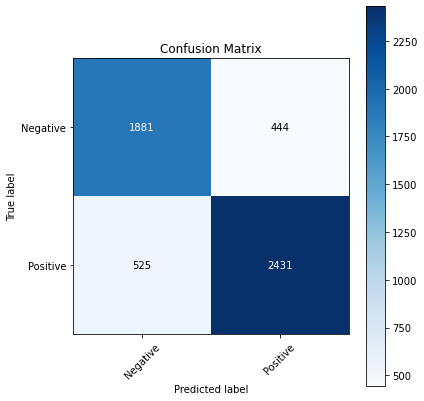

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and predicted on the test set
y_pred = nn.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['Negative', 'Positive']  # Assuming your classes are labeled as 0 (Negative) and 1 (Positive)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Fill in the matrix cells with the values
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

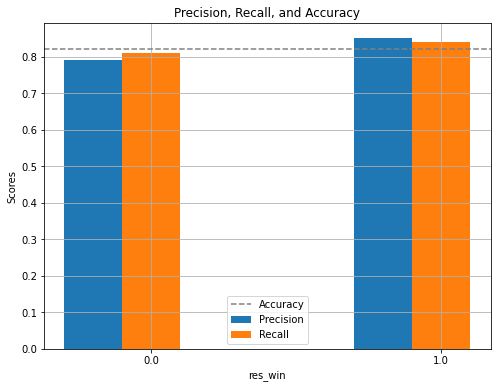

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Precision, Recall, and F1-score values for each class (0 and 1)
precision = [0.79, 0.85]
recall = [0.81, 0.84]

# Overall Accuracy
accuracy = 0.82

# Class labels
classes = ['0.0', '1.0']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set width of the bars
bar_width = 0.2
index = np.arange(len(classes))

# Bar plots for precision, recall, and F1-score
ax.bar(index - bar_width, precision, bar_width, label='Precision')
ax.bar(index, recall, bar_width, label='Recall')

# Plot the overall accuracy as a horizontal line
ax.axhline(y=accuracy, color='gray', linestyle='--', label='Accuracy')

# Set plot labels and title
ax.set_xlabel('res_win')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and Accuracy')
ax.set_xticks(index)
ax.set_xticklabels(classes)
ax.legend()

plt.grid(True)
plt.show()

In [20]:
# additional graphs

In [21]:
# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})
# Filter under favorite horse - column y_test= 'isFav' (Actual = 1)
favorite_horse_df = results_df[results_df['Actual'] == 1]
# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()
# Print the average win rate for the favorite horse
print("Average Win Rate for Favorite Horse:", favorite_horse_win_rate)

Average Win Rate for Favorite Horse: 0.8589309878213802


In [22]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

Precision: 0.8321861684693543


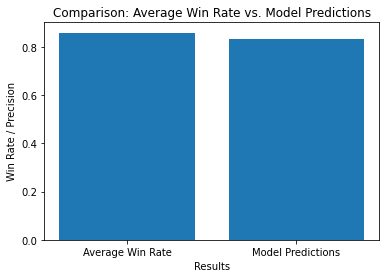

In [23]:
import matplotlib.pyplot as plt
# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()
# Plotting the results
labels = ['Average Win Rate', 'Model Predictions']
values = [favorite_horse_win_rate, precision]
plt.bar(labels, values)
plt.xlabel('Results')
plt.ylabel('Win Rate / Precision')
plt.title('Comparison: Average Win Rate vs. Model Predictions')
plt.show()

/var/folders/sg/g_kx7jjs4rs267h1_s2r64b40000gn/T/ipykernel_13545/3986759958.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = res_win_equal.corr()


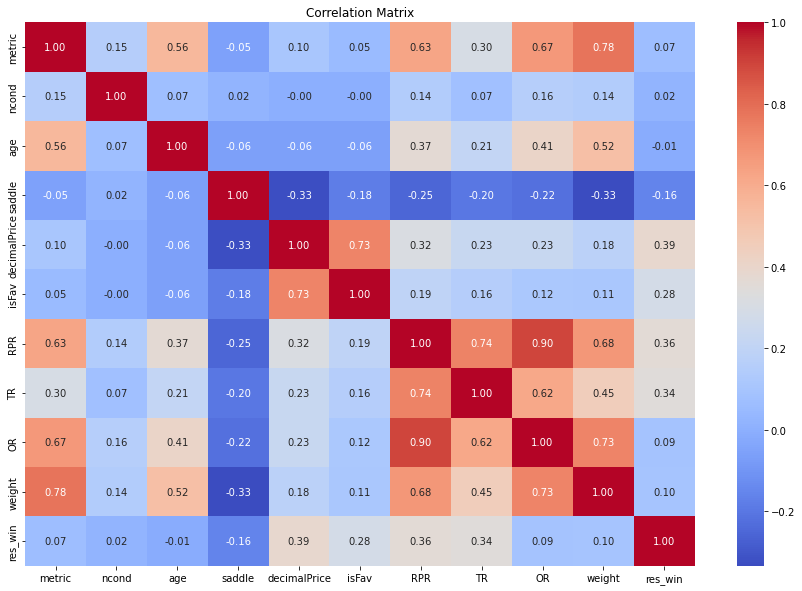

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = res_win_equal.corr()
# Display the correlation matrix as a table
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()